In [1]:
%pylab inline
import pandas as pd
import scipy.stats as stats

Populating the interactive namespace from numpy and matplotlib


In [4]:
prEss = pd.read_table('./Data/prEss-bool-18094genes-808cells-noNans.txt', sep='\t', index_col=0)
prEss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, ACH-001172 to ACH-002510
Columns: 18094 entries, A1BG to ZZZ3
dtypes: bool(18094)
memory usage: 13.9+ MB


In [5]:
numSamples, numGenes = prEss.shape
num_ess = prEss.sum()

low_thresh = 0.01
hi_thresh  = 0.80

too_low = where( num_ess<(low_thresh * numSamples) )[0]
prEss.drop( prEss.columns[too_low], axis=1, inplace=True)

num_ess = prEss.sum()

too_high = where( num_ess>(hi_thresh * numSamples) )[0]
prEss.drop( prEss.columns[too_high], axis=1, inplace=True)

prEss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, ACH-001172 to ACH-002510
Columns: 2987 entries, AAAS to ZZZ3
dtypes: bool(2987)
memory usage: 2.3+ MB


In [6]:
coeff_matrix = pd.read_table('./Data/coefficients-logReg-matrix-elastic-point25-2918feats-2987genes-Avana20q4.txt',\
                            sep='\t', index_col=0)
coeff_list   = pd.read_table('./Data/coefficients-logReg-list-elastic-point25-2918feats-2987genes-Avana20q4.txt', \
                            sep='\t')

In [7]:
coeff_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, plasma_cell to intercept
Columns: 2987 entries, AAAS to ZZZ3
dtypes: float64(2987)
memory usage: 66.5+ MB


In [8]:
coeff_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8716066 entries, 0 to 8716065
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Feature  object 
 1   Gene     object 
 2   coeff    float64
dtypes: float64(1), object(2)
memory usage: 199.5+ MB


<AxesSubplot:>

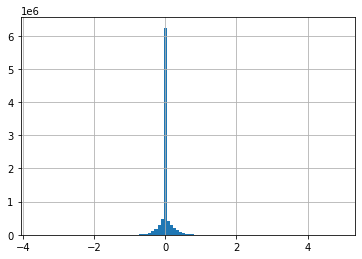

In [9]:
coeff_list.coeff.hist(bins=100)

In [10]:
coeff_matrix.loc['intercept']

AAAS       -2.718
AAMP       -0.276
AARS2      -1.148
AASDHPPT   -2.104
AATF       -1.700
            ...  
ZSWIM7     -4.752
ZSWIM8     -5.673
ZW10       -0.357
ZWINT      -1.441
ZZZ3       -4.455
Name: intercept, Length: 2987, dtype: float64

In [11]:
meta = pd.DataFrame( index=coeff_matrix.columns.values[:-1], columns=['Max','Min','FracEss','Intercept'])

In [12]:
meta.Max = coeff_matrix.drop('intercept', axis=0).max(0)
meta.Min = coeff_matrix.drop('intercept', axis=0).min(0)


In [13]:
meta.FracEss = prEss.sum(0) / numSamples
meta.Intercept = coeff_matrix.loc['intercept']


In [14]:
meta.head(5)

,Max,Min,FracEss,Intercept
AAAS,1.187,-0.735,0.080446,-2.718
AAMP,1.069,-1.017,0.443069,-0.276
AARS2,1.201,-0.861,0.294554,-1.148
AASDHPPT,1.049,-1.002,0.241337,-2.104
AATF,1.061,-0.914,0.178218,-1.700


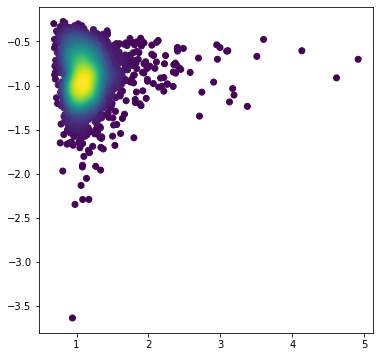

In [15]:
z = stats.gaussian_kde( np.vstack( [ meta.Max.values, meta.Min.values ]))( np.vstack( [ meta.Max, meta.Min ]))
idx = z.argsort()
x, y, z = meta.Max.values[idx], meta.Min.values[idx], z[idx]

figure( figsize=(6,6))
scatter(x, y, c=z)
show()

In [16]:
array(exp(meta.Intercept) / ( exp(meta.Intercept) + 1))

array([0.06191954, 0.4314347 , 0.24085458, ..., 0.00342576, 0.41168597,
       0.19139054])

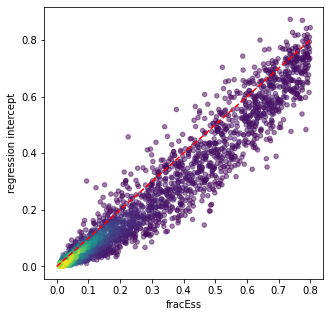

In [17]:
x = meta.FracEss.values
y = np.array( exp(meta.Intercept) / ( exp(meta.Intercept) + 1) )

xy = np.vstack([x,y])
z = stats.gaussian_kde(xy)(xy)
dx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

figure( figsize=(5,5))
scatter(x, y, c=z, s=20, alpha=0.5)
plot([0,0.8], [0,0.8], 'r--')
xlabel('fracEss')
ylabel('regression intercept')
show()

# Strong coefficient threshold

<AxesSubplot:>

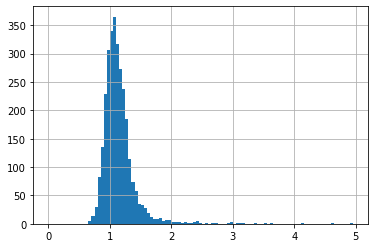

In [102]:
meta.Max.hist(bins=arange(0,5,0.05))

<AxesSubplot:>

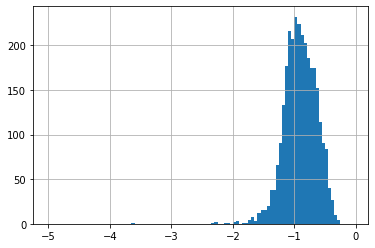

In [103]:
meta.Min.hist(bins=arange(-5,0,0.05))

In [157]:
#
# SET COEFFICIENT THRESHOLD HERE
#

thresh = 1.2

<AxesSubplot:>

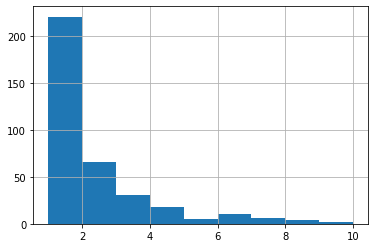

In [197]:
feats_ge_thresh = coeff_list[ abs(coeff_list.coeff) > thresh].groupby('Feature').count().sort_values('coeff', ascending=True)
#feats_ge_thresh.head(25)
#feats_ge_thresh.iloc[220:250]
feats_ge_thresh.Gene.hist( bins=arange(1,11) )

In [159]:
unique_strong_features = coeff_list[ abs(coeff_list.coeff) > thresh]['Feature'].unique()
len(unique_strong_features)
#
# at thresh = 1.2, there are 393 features, 220 of which have 1 feature-gene association
#

393

In [160]:
sorted( unique_strong_features )

['ABCA13_LOF',
 'ABCA5_LOF',
 'ABCA8_LOF',
 'ABCA9_LOF',
 'ABCB5_LOF',
 'ACADVL_LOF',
 'ACOX1_LOF',
 'ACSM1_LOF',
 'ADAM7_LOF',
 'AGT_LOF',
 'AHDC1_LOF',
 'AIMP1_LOF',
 'AIRE_LOF',
 'ALDH1A2_LOF',
 'ALK_LOF',
 'ALL',
 'AML',
 'ANKRD11_LOF',
 'ANKRD30A_LOF',
 'ANO4_LOF',
 'AP2M1_LOF',
 'APAF1_LOF',
 'APC_LOF',
 'APOH_LOF',
 'ARID1A_LOF',
 'ARID4A_LOF',
 'ARID4B_LOF',
 'ARMC4_LOF',
 'ARMC9_LOF',
 'ARMCX1_LOF',
 'ASAP1_LOF',
 'ASCC3_LOF',
 'ASXL1_LOF',
 'ATM_LOF',
 'ATP2B1_LOF',
 'ATP9B_LOF',
 'ATRX_LOF',
 'ATR_LOF',
 'ATXN1_LOF',
 'ATXN7_LOF',
 'Adherent',
 'BAZ2B_LOF',
 'BCOR_LOF',
 'BDP1_LOF',
 'BPIFB4_LOF',
 'BRAF_GOF',
 'BRCA1_LOF',
 'BRCA2_LOF',
 'BTBD7_LOF',
 'C2CD5_LOF',
 'C8A_LOF',
 'C8orf37_LOF',
 'C8orf58_LOF',
 'CALCR_LOF',
 'CAMSAP1_LOF',
 'CAPN15_LOF',
 'CASD1_LOF',
 'CC2D2A_LOF',
 'CCDC160_LOF',
 'CCDC78_LOF',
 'CCDC84_LOF',
 'CDH_VIM_hi',
 'CDH_VIM_lo',
 'CDK13_LOF',
 'CDKN2A_GOF',
 'CDKN2A_LOF',
 'CENPF_LOF',
 'CEP164_LOF',
 'CEP290_LOF',
 'CHD2_LOF',
 'CHD9_LOF',
 'CHUK_

In [202]:
with open('./Data/unique_strong_features.txt', 'w') as fout:
    for feat in sorted(unique_strong_features):
        fout.write( feat + '\n' )
fout.close()

In [161]:
numLOF = len( [x for x in unique_strong_features if '_LOF' in x] )
numGOF = len( [x for x in unique_strong_features if '_GOF' in x] )
numOther = len(unique_strong_features) - numLOF - numGOF
print(numLOF, numGOF, numOther)

327 20 46
